# Variabili casuali indipendenti e identicamente distribuite, iid.

Due variabili stochastiche $X$, $Y$ sono
- statisticamente indipendenti se la loro probabilità congiunta è uguale al prodotto delle probabilità marginali,

  $$p_{XY}(x,y) = p_X(x) \, p_Y(y) \ ,$$

- identicamente distribuite se hanno la stessa densità di probabilità,

  $$p_X(x) = p_Y(x)$$

## Teoremi sulle variabili casuali i.i.d.

Dato un insieme di $N$ variabili casuali iid $\{ X_n \}_{n=1:N}$, con valore atteso $E[X_n] = \mu$ e varianza $E[(X_n - \mu)^2] = \sigma$, allora la sua media campionaria

$$\bar{X}_N = \frac{1}{N} \sum_{n=1}^N X_n \ $$

- per il **teorema dei grandi numeri**, converge al valore atteso $\mu$ della distribuzione di probabilità.

- per il **teorema del limite centrale**, è una variabile casuale che converge in distribuzione a una variabile casuale gaussiana con valore atteso $\mu$ e varianza $\frac{\sigma^2}{n}$,

  $$\bar{X}_N \rightarrow \mathscr{N}\left(\mu, \frac{\sigma^2}{N} \right) \qquad , \qquad \text{as $N \rightarrow \infty$}$$



### Convergenza in statistica, **todo**
- **quasi certamente**. Esempio: teorema dei grandi numeri in forma forte. Il limite della media campionaria è diverso da una variabile casuale $\mu$ (**todo** *controllare*!) solo nel caso di eventi di probabilità nulla,

   $$P\left( \lim_{N \rightarrow \infty} \bar{X}_N = \mu \right) = 1 \ .$$
  
- **in probabilità**. Esempio: teorema dei grandi numeri in forma debole. Per ogni valore di $\varepsilon > 0$,

   $$P\left( \left|\lim_{N \rightarrow \infty} \bar{X}_N - \mu \right| < \varepsilon \right) = 1 \ .$$

- **convergenza in distribuzione**. Esempio: teorema del limite centrale...

## Esempio: teoremi dei grandi numeri e del limite centrale


### Librerie e funzioni

In [1]:
"""

"""

import numpy as np
import matplotlib.pyplot as plt

#> -----------------------------------------------------------------------------
#> Set-up logging at the begin of the script
import logging

for handler in logging.root.handlers[:]:  logging.root.removeHandler(handler)
logging.basicConfig(level=logging.INFO)

#> -----------------------------------------------------------------------------

def sample_to_pdf(x, bins=100, density=True):
  """  """
  hist, bin_edges = np.histogram(x, bins=bins, density=True)
  bin_cen = 0.5 * ( bin_edges[:-1] + bin_edges[1:] )
  return hist, bin_cen



### Dimensione campione

In [2]:
#> Population
sample_size_max = 2000
n_samples       = 5000
n_sample_size   = 5           # For convergence

population_size = sample_size_max * n_samples
sample_size_v = sample_size_max // ( 2**np.arange(0, n_sample_size) )[::-1]

### Definizione delle variabili casuali

In [3]:
#> List of random number generators for the population
# numpy random number generators with parameters
rgen_list = [
    { 'name': 'Bernoulli (discrete)',
      'generator': np.random.default_rng().choice, 'params': {},   # Bernoulli (discrete distribution)
      'population_params': {'avg': 0., 'sigma': 1.},
      'write_params': lambda mu, sigma, n: {'a':[mu-sigma, mu+sigma], 'p':[.5, .5], 'size': n},
      'sample_avg': [],
      'sample_avg_stat': {'avg': 0., 'std': 0.},
      'histograms': [],
      'xlimit': [-2., 2.]
    },
    { 'name': 'Normal',
      'generator': np.random.default_rng().normal, 'params': {},   # normal distribution
      'population_params': {'avg': 0., 'sigma': 1.}, \
      'write_params': lambda mu, sigma, n: {'loc': mu, 'scale': sigma, 'size': n},
      'sample_avg': [],
      'sample_avg_stat': {'avg': 0., 'std': 0.},
      'histograms': [],
      'xlimit': [-3., 3.]
    },
    { 'name': 'Uniform',
      'generator': np.random.default_rng().uniform, 'params': {},   # uniform distribution
      'population_params': {'avg': 0., 'sigma': 1.}, \
      'write_params': lambda mu, sigma, n: {'low': mu-sigma, 'high': mu+sigma, 'size': n},
      'sample_avg': [],
      'sample_avg_stat': {'avg': 0., 'std': 0.},
      'histograms': [],
      'xlimit': [-2, 2.]
    },
    { 'name': 'Log-normal',
      'generator': np.random.default_rng().lognormal, 'params': {},  # lognormal distribution
      'population_params': {'avg': 1., 'sigma': 1.}, \
      'write_params': lambda mu, sigma, n: {'mean': mu, 'sigma': sigma, 'size': n},
      'sample_avg': [],
      'sample_avg_stat': {'avg': 0., 'std': 0.},
      'histograms': [],
      'xlimit': [0, 15.]
    },
]

n_gen = len(rgen_list)

## Stima della distribuzione di probabilità della media campionaria

Per tutte le popolazioni definite sopra, vengono
- estratti $N_s$ campioni,
- valuata la media campionaria $\{\overline{X}_s\}_{s = 1:N_s}$,
- stimata la densità di probabilità $f_{\overline{X}}(x)$,
- calcolate le statistiche: media $\mu_{\overline{x}}$, e variazione standard $\sigma_{\overline{x}}^2$

In [4]:
samples = { 'gen': {} }

#> Generate populations with different probability distribution and draw samples from them
for rgen in rgen_list:

  print(rgen['name'])

  samples['gen'][rgen['name']] = {}

  pop_params = rgen['population_params']
  gen_params = rgen['write_params'](pop_params['avg'], pop_params['sigma'], population_size)
  pop = rgen['generator'](**gen_params)

  #> Loop over sample size
  for sample_size in sample_size_v:

    samples['gen'][rgen['name']][str(sample_size)] = {
         'pdf': [], 'sample_avgs': [],
         'xlim': rgen['xlimit'],
         'sigma_pop_num': np.std(pop), 'sigma_pop': None, 'sigma2_ratio': None}
    #> Take samples and evaluate average
    i_e = 0
    for i_s in range(n_samples):
      sam = pop[i_e:i_e+sample_size]
      f, x = sample_to_pdf(sam, bins=20)

      samples['gen'][rgen['name']][str(sample_size)]['pdf'].append({'x': x, 'f': f})
      samples['gen'][rgen['name']][str(sample_size)]['sample_avgs'].append(np.mean(sam))

      i_e = i_e + sample_size


#> Statistics of the sample average
logging.info("Distribution:sample_size - sigma2_ratio = sigma2_pop/sigma2_sample_avg - sample_mean: avg, std dev")
for rk, r in samples['gen'].items():
  logging.info(f"{rk}:")
  #> Loop over sample size
  for sk, s in r.items():
    s['sample_avg_avg'] = np.mean(s['sample_avgs'])
    s['sample_avg_std'] = np.std(s['sample_avgs'])
    s['sigma2_ratio'] = s['sigma_pop_num']**2 / s['sample_avg_std']**2

    logging.info(f"{rk}:{sk} - sigma2_ratio: {s['sigma2_ratio']} - sample_mean: avg, std: {s['sample_avg_avg']}, {s['sample_avg_std']}")

# logging.info(f"Central limit theorem, avg, std {population['avg']}, {population['sigma']/np.sqrt(samples['size'])}")




Bernoulli (discrete)


Normal


Uniform


Log-normal


INFO:root:Distribution:sample_size - sigma2_ratio = sigma2_pop/sigma2_sample_avg - sample_mean: avg, std dev


INFO:root:Bernoulli (discrete):


INFO:root:Bernoulli (discrete):125 - sigma2_ratio: 130.48873539312652 - sample_mean: avg, std: -0.0021024000000000004, 0.08754140000159924


INFO:root:Bernoulli (discrete):250 - sigma2_ratio: 255.3016726764713 - sample_mean: avg, std: -0.00043039999999999984, 0.0625854196745536


INFO:root:Bernoulli (discrete):500 - sigma2_ratio: 494.87981554102 - sample_mean: avg, std: -9.040000000000008e-05, 0.04495211483167393


INFO:root:Bernoulli (discrete):1000 - sigma2_ratio: 981.7797106290221 - sample_mean: avg, std: -0.00021719999999999994, 0.0319148621203351


INFO:root:Bernoulli (discrete):2000 - sigma2_ratio: 1984.4698047721356 - sample_mean: avg, std: -7.11999999999999e-05, 0.022448005046328726


INFO:root:Normal:


INFO:root:Normal:125 - sigma2_ratio: 125.44676031260101 - sample_mean: avg, std: 0.0010035411733124295, 0.08927152480901648


INFO:root:Normal:250 - sigma2_ratio: 246.096093460355 - sample_mean: avg, std: 0.0004777506119953742, 0.06373680920172255


INFO:root:Normal:500 - sigma2_ratio: 499.25002837037033 - sample_mean: avg, std: -6.475284275787319e-05, 0.04474903030507306


INFO:root:Normal:1000 - sigma2_ratio: 982.5261100053331 - sample_mean: avg, std: 0.00014417558336456406, 0.03189852691964436


INFO:root:Normal:2000 - sigma2_ratio: 1983.3845963304777 - sample_mean: avg, std: 0.00031418350954096524, 0.022451181967151002


INFO:root:Uniform:


INFO:root:Uniform:125 - sigma2_ratio: 127.71378826669536 - sample_mean: avg, std: 4.831877656203565e-05, 0.051087393072990636


INFO:root:Uniform:250 - sigma2_ratio: 254.31635852951987 - sample_mean: avg, std: 0.0004390455587827443, 0.03620307726010902


INFO:root:Uniform:500 - sigma2_ratio: 515.6717285539237 - sample_mean: avg, std: 0.0001709188267367542, 0.025424122610124472


INFO:root:Uniform:1000 - sigma2_ratio: 987.7181918921833 - sample_mean: avg, std: -4.553437511150875e-05, 0.018370294089630115


INFO:root:Uniform:2000 - sigma2_ratio: 1969.5733053532467 - sample_mean: avg, std: -0.00010120152298574477, 0.013009079287535528


INFO:root:Log-normal:


INFO:root:Log-normal:125 - sigma2_ratio: 125.44534426363803 - sample_mean: avg, std: 4.485806184854368, 0.5238205448222385


INFO:root:Log-normal:250 - sigma2_ratio: 253.6622447853585 - sample_mean: avg, std: 4.480791814287109, 0.3683679914448849


INFO:root:Log-normal:500 - sigma2_ratio: 515.8208318149294 - sample_mean: avg, std: 4.481072524268877, 0.25832138651292014


INFO:root:Log-normal:1000 - sigma2_ratio: 1008.0339501893967 - sample_mean: avg, std: 4.486489832053728, 0.18478734352912074


INFO:root:Log-normal:2000 - sigma2_ratio: 1999.6806653314852 - sample_mean: avg, std: 4.484661084768804, 0.13119868375961438


### Grafici

#### Deviazione standard della media campionaria

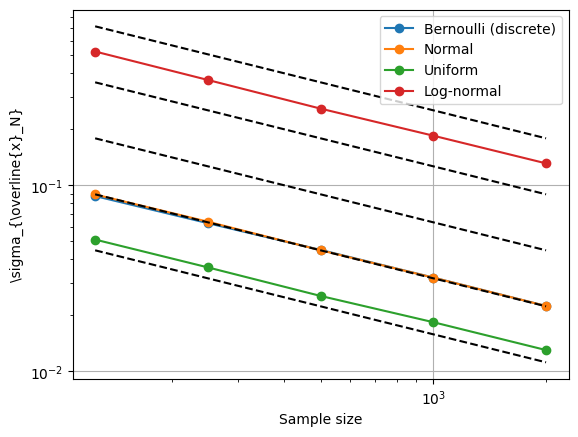

In [5]:
fig = plt.figure()
ax = fig.add_subplot()


#> Std dev of sample means for different probability distributions
for rk, r in samples['gen'].items():
  sample_size_vector = np.array([ int(sk) for sk, s in r.items() ])
  std_dev_vector     = np.array([ s['sample_avg_std'] for sk, s in r.items() ])
  ax.plot(sample_size_vector, std_dev_vector, '-o', label=rk)

#> Lines with -0.5 slope in the log plot, to check the trend of sample_avg_sigma ~ 1/sqrt(sample_size)
for e in 2.0**np.arange(-1, 4):
  ax.plot(sample_size_vector, e/np.sqrt(sample_size_vector), '--', color='black')

ax.set_ylabel('\sigma_{\overline{x}_N}')
ax.set_xlabel('Sample size')
ax.legend()
ax.set_xscale('log');  ax.set_yscale('log');  ax.grid()

#### Distribuzione di probabilità

Text(0.5, 0.98, 'Distribution of sample average, scaled')

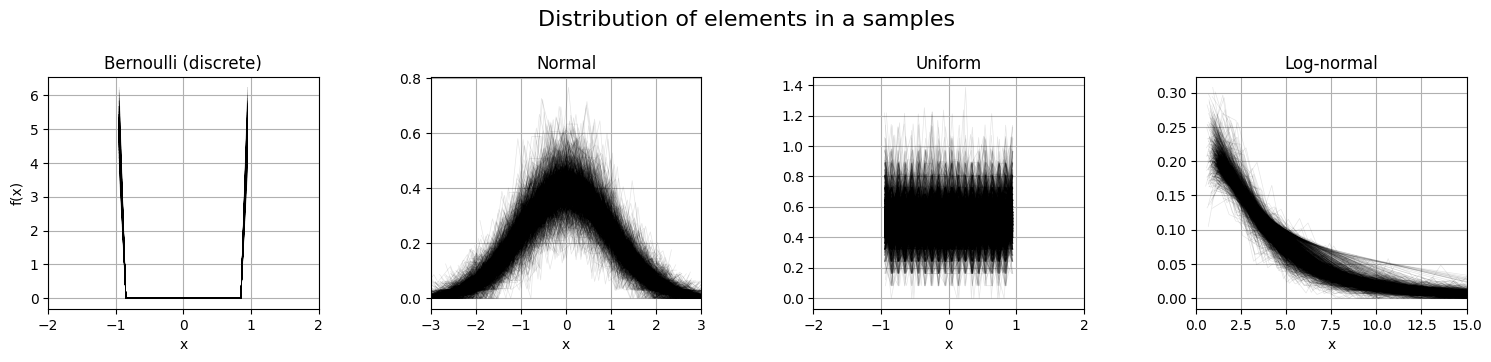

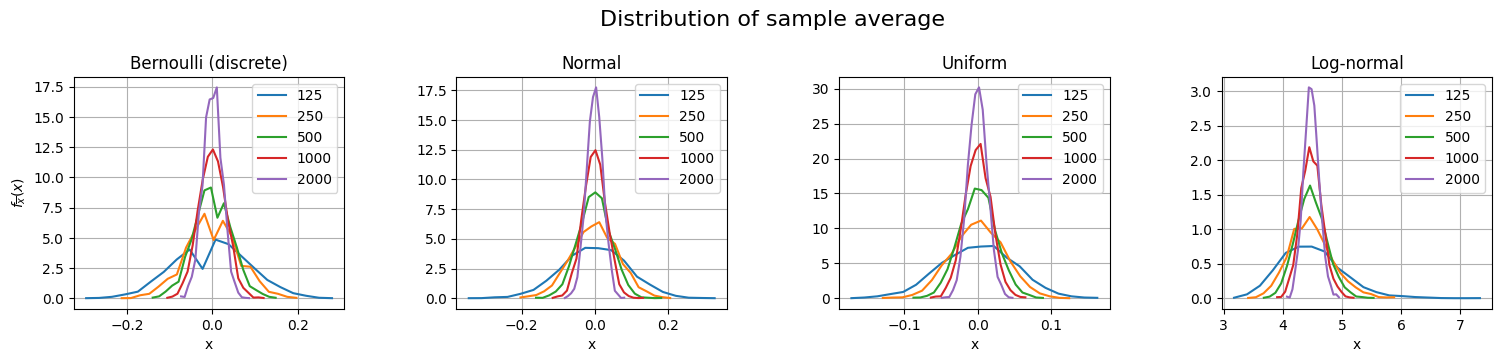

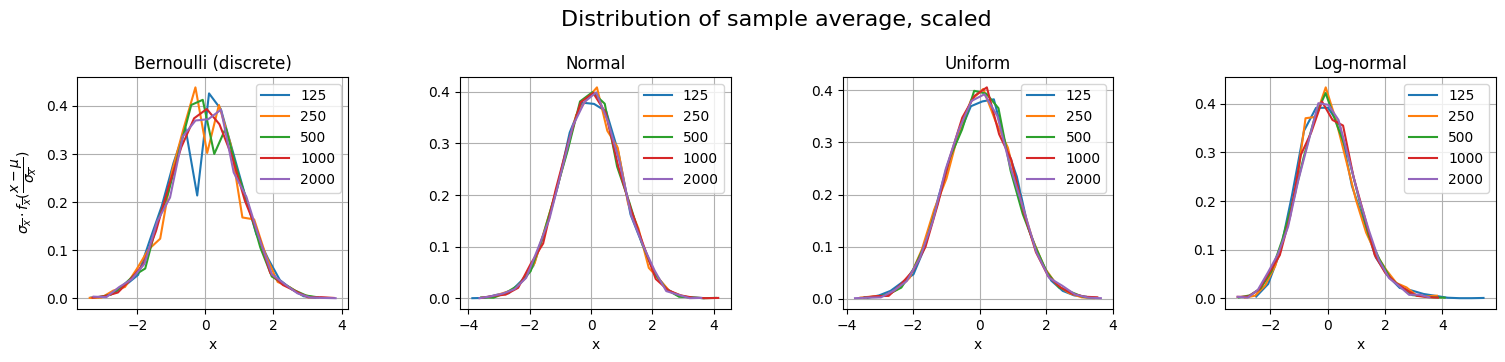

In [6]:
plot_height = 4

#> Distribuition within the samples
fig, axs = plt.subplots(1, n_gen, figsize=(plot_height*n_gen, plot_height))
fig.tight_layout(pad=5)
ir = 0
for rk, r in samples['gen'].items():

  #> Loop over sample size
  for sk, s in r.items():

    for i in s['pdf'][::10]:
      axs[ir].plot(i['x'], i['f'], alpha=0.1, linewidth=.5, color='black')

  axs[ir].grid()
  axs[ir].set_xlim(s['xlim'])
  axs[ir].set_xlabel('x')
  if ( ir == 0 ):  axs[ir].set_ylabel('f(x)')
  axs[ir].set_title(rk)
  ir += 1

fig.suptitle('Distribution of elements in a samples', fontsize=16)

#> Distribution of the sample average
fig, axs = plt.subplots(1, n_gen, figsize=(plot_height*n_gen, plot_height))
fig.tight_layout(pad=5)
ir = 0
for rk, r in samples['gen'].items():
  for sk, s in r.items():
    # axs[ir].hist(s['sample_avgs'], alpha=0.3, density=True)
    # print('sample_avgs:', s['sample_avgs'])
    f, x = sample_to_pdf(s['sample_avgs'], bins=20)
    axs[ir].plot(x, f, label=sk)

  axs[ir].grid()
  axs[ir].set_xlabel('x')
  if ( ir == 0 ):  axs[ir].set_ylabel('$f_{\overline{x}}(x)$')
  axs[ir].set_title(rk)
  axs[ir].legend()
  ir += 1

fig.suptitle('Distribution of sample average', fontsize=16)


#> Distribution of the sample average (normalized over sample_sigma)
fig, axs = plt.subplots(1, n_gen, figsize=(plot_height*n_gen, plot_height))
fig.tight_layout(pad=5)
ir = 0
for rk, r in samples['gen'].items():
  for sk, s in r.items():
    # axs[ir].hist((s['sample_avgs']-s['sample_avg_avg'])/s['sample_avg_std'], alpha=0.3, density=True)
    f, x = sample_to_pdf(s['sample_avgs'], bins=20)
    axs[ir].plot((x-s['sample_avg_avg'])/s['sample_avg_std'], f*s['sample_avg_std'], label=sk)

  axs[ir].grid()
  axs[ir].set_xlabel('x')
  if ( ir == 0 ):  axs[ir].set_ylabel('$\sigma_{\overline{x}} \cdot f_{\overline{x}}(\dfrac{x-\mu}{\sigma_{\overline{x}}})$')
  axs[ir].set_title(rk)
  axs[ir].legend()

  ir += 1

fig.suptitle('Distribution of sample average, scaled', fontsize=16)
